   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

Data Types:
 sepal length (cm)     float64
sepal width (cm)      float64
petal length (cm)     float64
petal width (cm)      float64
species              category
dtype: object

Missing Values:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

Summary Statistics:
        sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000

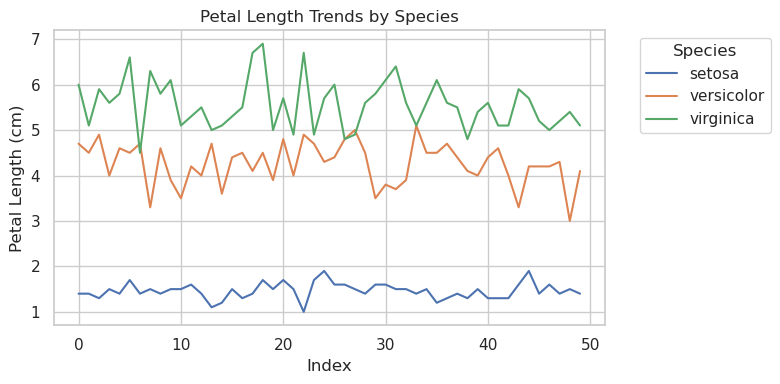

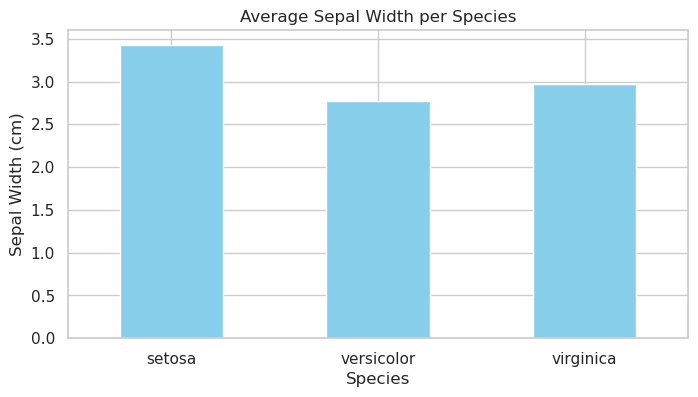

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


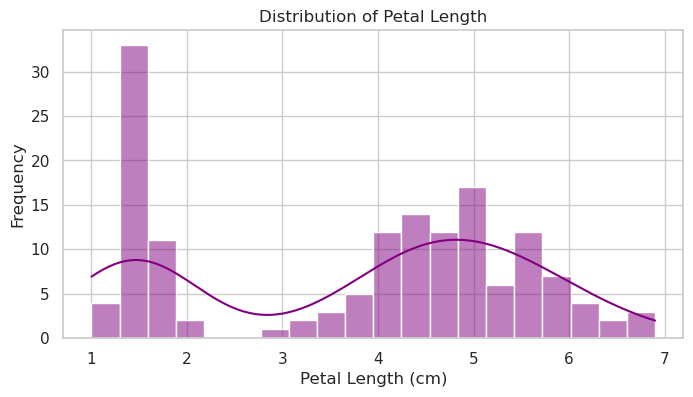

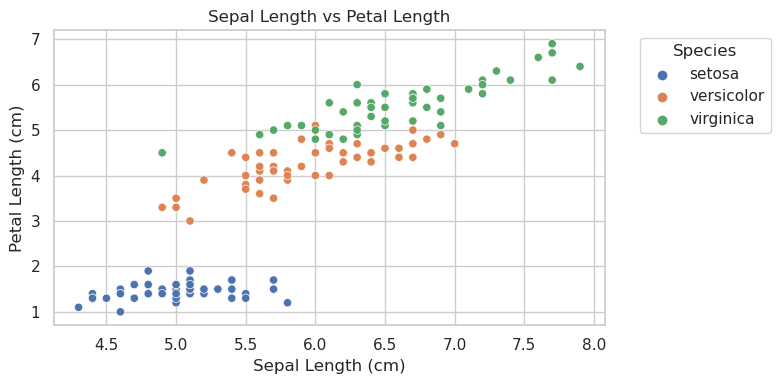

In [12]:
 from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Enable inline plotting for Jupyter
%matplotlib inline

# Load the Iris dataset with error handling
try:
    iris = load_iris()
    df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
    df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
except Exception as e:
    print("Error loading dataset:", e)
    df = pd.DataFrame()  # fallback

# Replace inf with NaN, then drop them (if needed)
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

# Display first few rows, data types, and missing values
print(df.head())
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())

# Basic statistics
summary_stats = df.describe()
print("\nSummary Statistics:\n", summary_stats)

# Group by species and compute mean (suppressing future warning)
grouped = df.groupby('species', observed=False).mean()
print("\nMean Values by Species:\n", grouped)

# Observation
print("\nObservation:")
print("Setosa species has noticeably smaller petal length and width compared to others.")

# Set seaborn style
sns.set(style="whitegrid")

# Line chart: Mean petal length per species (simulate a "trend" by index)
plt.figure(figsize=(8, 4))
for species in df['species'].unique():
    subset = df[df['species'] == species].reset_index()
    plt.plot(subset.index, subset['petal length (cm)'], label=species)

plt.title('Petal Length Trends by Species')
plt.xlabel('Index')
plt.ylabel('Petal Length (cm)')

# legend outside
plt.legend(title='Species', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Adjust layout so nothing gets cut off
plt.show()

# Bar chart: Average sepal width per species
plt.figure(figsize=(8, 4))
grouped['sepal width (cm)'].plot(kind='bar', color='skyblue')
plt.title('Average Sepal Width per Species')
plt.xlabel('Species')
plt.ylabel('Sepal Width (cm)')
plt.xticks(rotation=0)
plt.show()

# Histogram: Distribution of petal length
plt.figure(figsize=(8, 4))
sns.histplot(df['petal length (cm)'], kde=True, bins=20, color='purple')
plt.title('Distribution of Petal Length')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Frequency')
plt.show()

# Scatter plot: Sepal Length vs Petal Length
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df, x='sepal length (cm)', y='petal length (cm)', hue='species')
plt.title('Sepal Length vs Petal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')

# Move legend outside the plot
plt.legend(title='Species', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Adjust layout to fit everything
plt.show()

